In [ ]:
# HYPOTHESIS A


import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8, 5)

np.random.seed(42)

print("NumPy/SciPy environment ready. Using CPU for synthetic experiment.")


NumPy/SciPy environment ready. Using CPU for synthetic experiment.


In [ ]:
# generate synthetic data + compute true posteriors + true Bayes error

from scipy.stats import norm

# number of samples
n = 10000

# class priors
pi0 = 0.5
pi1 = 0.5

# Gaussian parameters
mu0 = -1.0
mu1 = +1.0
sigma = 1.0

y_true = np.random.binomial(1, pi1, size=n)


x = np.zeros(n)
x[y_true == 0] = np.random.normal(mu0, sigma, size=np.sum(y_true == 0))
x[y_true == 1] = np.random.normal(mu1, sigma, size=np.sum(y_true == 1))

# Compute true posteriors c_i = P(y=1 | x)
p0 = norm.pdf(x, loc=mu0, scale=sigma)
p1 = norm.pdf(x, loc=mu1, scale=sigma)
c_true = p1 / (p0 + p1)   # exact posterior


true_bayes_error = np.mean(np.minimum(c_true, 1 - c_true))

print(f"Generated {n} synthetic samples.")
print(f"True Bayes error ≈ {true_bayes_error:.4f}")


Generated 10000 synthetic samples.
True Bayes error ≈ 0.1573


In [ ]:

A = 50

annotator_labels_unbiased = np.random.binomial(1, c_true[:, None], size=(n, A))


c_unbiased = annotator_labels_unbiased.mean(axis=1)

bayes_unbiased = np.mean(np.minimum(c_unbiased, 1 - c_unbiased))

# Compare to true Bayes error
print(f"True Bayes error       ≈ {true_bayes_error:.4f}")
print(f"Unbiased est. Bayes    ≈ {bayes_unbiased:.4f}")
print(f"Difference (unbiased)  ≈ {bayes_unbiased - true_bayes_error:.4e}")


True Bayes error       ≈ 0.1573
Unbiased est. Bayes    ≈ 0.1544
Difference (unbiased)  ≈ -2.8658e-03


In [ ]:


# bias parameters
alpha = 0.2
b = 0.7


c_biased_true = (1 - alpha) * c_true + alpha * b

c_biased_true = np.clip(c_biased_true, 1e-6, 1 - 1e-6)


annotator_labels_biased = np.random.binomial(1, c_biased_true[:, None], size=(n, A))


c_biased = annotator_labels_biased.mean(axis=1)


bayes_biased = np.mean(np.minimum(c_biased, 1 - c_biased))

bayes_biased_noiseless = np.mean(np.minimum(c_biased_true, 1 - c_biased_true))

print("=== Bayes error comparison ===")
print(f"True Bayes error                ≈ {true_bayes_error:.4f}")
print(f"Unbiased annotators est.        ≈ {bayes_unbiased:.4f}")
print(f"Biased annotators est.          ≈ {bayes_biased:.4f}")
print(f"Biased (noiseless c') est.      ≈ {bayes_biased_noiseless:.4f}")
print()
print(f"Difference (unbiased - true)    ≈ {bayes_unbiased - true_bayes_error:.4e}")
print(f"Difference (biased - true)      ≈ {bayes_biased - true_bayes_error:.4e}")
print(f"Difference (biased_noiseless - true) ≈ {bayes_biased_noiseless - true_bayes_error:.4e}")


=== Bayes error comparison ===
True Bayes error                ≈ 0.1573
Unbiased annotators est.        ≈ 0.1544
Biased annotators est.          ≈ 0.2227
Biased (noiseless c') est.      ≈ 0.2250

Difference (unbiased - true)    ≈ -2.8658e-03
Difference (biased - true)      ≈ 6.5436e-02
Difference (biased_noiseless - true) ≈ 6.7717e-02


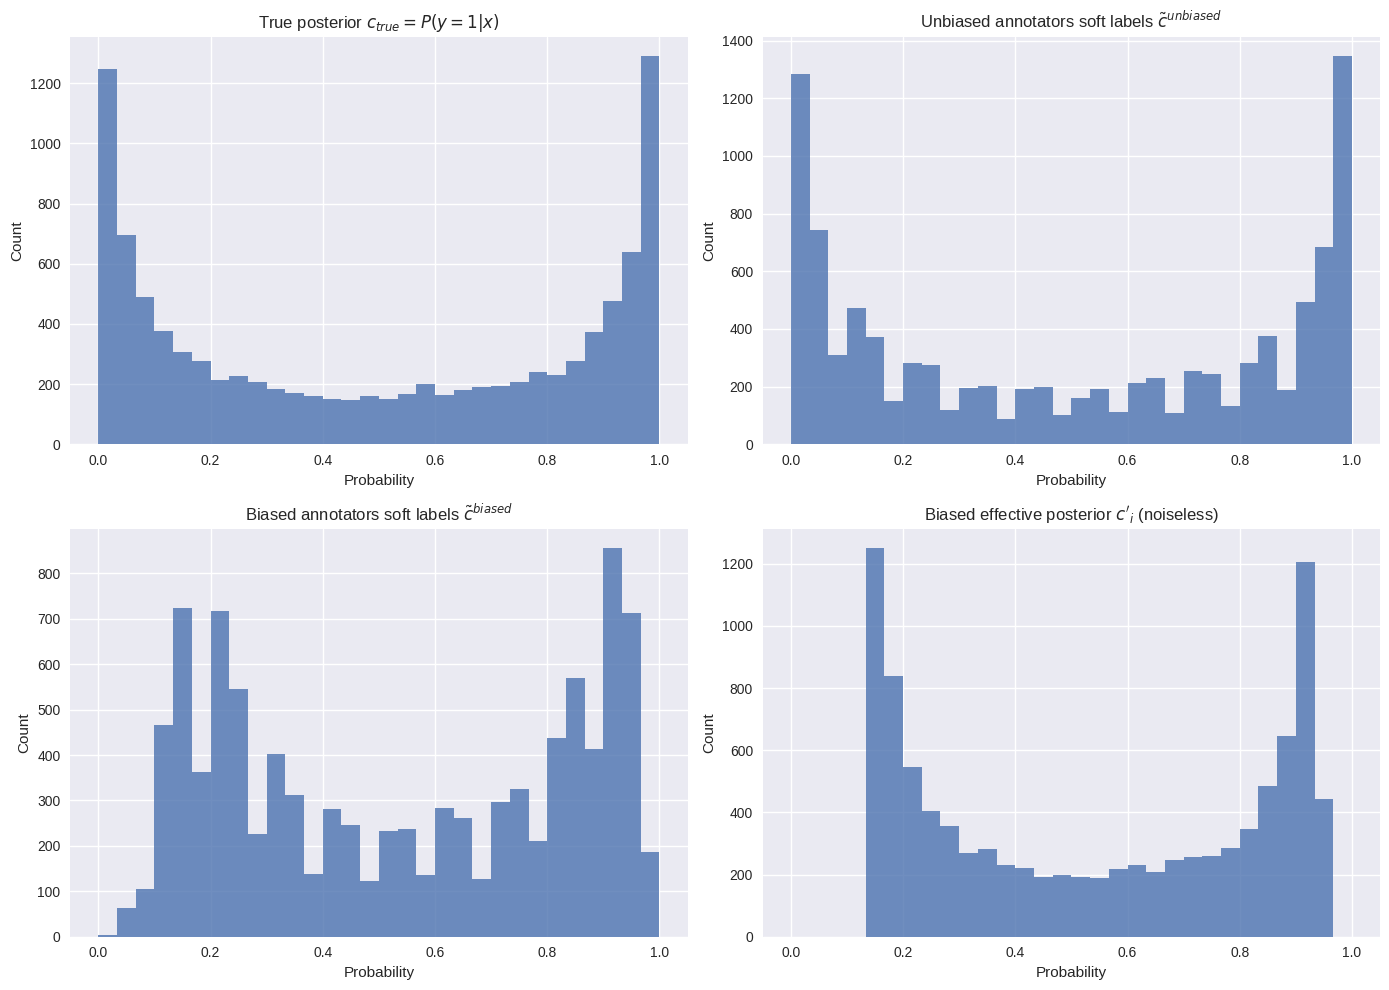

In [ ]:
# visualize soft-label distributions (true vs unbiased vs biased)

bins = 30

plt.figure(figsize=(14, 10))

# 1) True posterior c_true
plt.subplot(2, 2, 1)
plt.hist(c_true, bins=bins, range=(0, 1), alpha=0.8)
plt.title("True posterior $c_{true} = P(y=1|x)$")
plt.xlabel("Probability")
plt.ylabel("Count")

# 2) Unbiased annotator soft labels
plt.subplot(2, 2, 2)
plt.hist(c_unbiased, bins=bins, range=(0, 1), alpha=0.8)
plt.title("Unbiased annotators soft labels $\\tilde c^{unbiased}$")
plt.xlabel("Probability")
plt.ylabel("Count")

# 3) Biased annotator soft labels (sampled)
plt.subplot(2, 2, 3)
plt.hist(c_biased, bins=bins, range=(0, 1), alpha=0.8)
plt.title("Biased annotators soft labels $\\tilde c^{biased}$")
plt.xlabel("Probability")
plt.ylabel("Count")

# 4) Biased effective probabilities c_biased_true (noiseless)
plt.subplot(2, 2, 4)
plt.hist(c_biased_true, bins=bins, range=(0, 1), alpha=0.8)
plt.title("Biased effective posterior $c'_i$ (noiseless)")
plt.xlabel("Probability")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


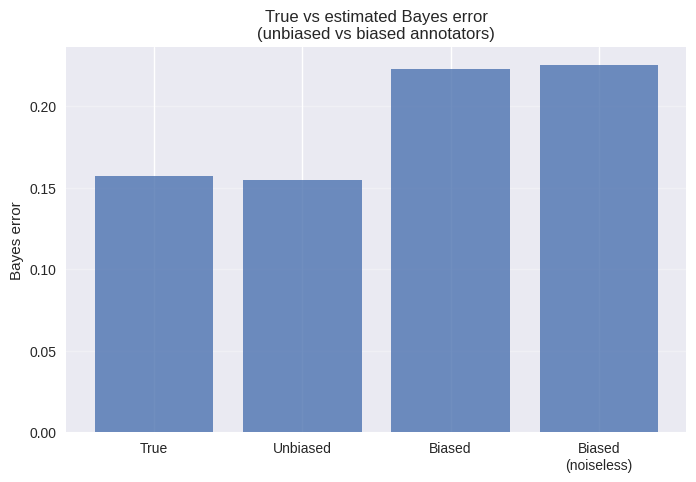

True           : 0.1573
Unbiased       : 0.1544
Biased         : 0.2227
Biased
(noiseless): 0.2250


In [ ]:
# cell6: bar chart comparing true vs estimated Bayes errors

labels = ["True", "Unbiased", "Biased", "Biased\n(noiseless)"]
values = [
    true_bayes_error,
    bayes_unbiased,
    bayes_biased,
    bayes_biased_noiseless,
]

x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, values, alpha=0.8)
plt.xticks(x, labels)
plt.ylabel("Bayes error")
plt.title("True vs estimated Bayes error\n(unbiased vs biased annotators)")
plt.grid(axis="y", alpha=0.3)
plt.show()

for label, v in zip(labels, values):
    print(f"{label:15s}: {v:.4f}")
